## Random Vs. stratified Sampling

# Stratified Sampling 

- Spilt population into strata or subclass
- Randomly sample within each stratum( even if some groups are small)

In [1]:
import pandas as pd
dataset=pd.read_csv('premier-player-23-24.csv')
dataset.head()

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90,Team
0,Rodri,es ESP,MF,27.0,34,34,2931.0,32.6,8.0,9.0,...,0.28,0.52,0.25,0.52,0.12,0.12,0.24,0.12,0.24,Manchester City
1,Phil Foden,eng ENG,"FW,MF",23.0,35,33,2857.0,31.7,19.0,8.0,...,0.25,0.85,0.60,0.85,0.33,0.26,0.59,0.33,0.59,Manchester City
2,Ederson,br BRA,GK,29.0,33,33,2785.0,30.9,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Manchester City
3,Julián Álvarez,ar ARG,"MF,FW",23.0,36,31,2647.0,29.4,11.0,8.0,...,0.27,0.65,0.31,0.58,0.44,0.22,0.66,0.39,0.61,Manchester City
4,Kyle Walker,eng ENG,DF,33.0,32,30,2767.0,30.7,0.0,4.0,...,0.13,0.13,0.00,0.13,0.01,0.09,0.10,0.01,0.10,Manchester City


In [3]:
#random_sampling
import numpy as np
random_sample=dataset.sample(n=30,replace=False,random_state=42)
ast_var_season1=random_sample['Ast'].var()
print(f"Random  variance goal assit per season : {ast_var_season1:.2f}")


Random  variance goal assit per season : 6.10


In [5]:
#stratified_sampling
stratified_sample=(dataset[dataset['Pos'].isin(['MF', 'FW', 'DF'])].groupby('Pos', group_keys=False).apply(lambda x: x.sample(n=10, random_state=42)))
ast_var_season2=stratified_sample['Ast'].var()
print(f"Stratified Vairance goal assist per season: {ast_var_season2:.2f}")


Stratified Vairance goal assist per season: 9.90


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16284\3029657343.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample=(dataset[dataset['Pos'].isin(['MF', 'FW', 'DF'])].groupby('Pos', group_keys=False).apply(lambda x: x.sample(n=10, random_state=42)))


In [7]:
# Error Difference
print(f"Error Difference in Variance between Random and Stratified sampling:{abs(ast_var_season1-ast_var_season2):.2f} ")

Error Difference in Variance between Random and Stratified sampling:3.81 


## Visualize 

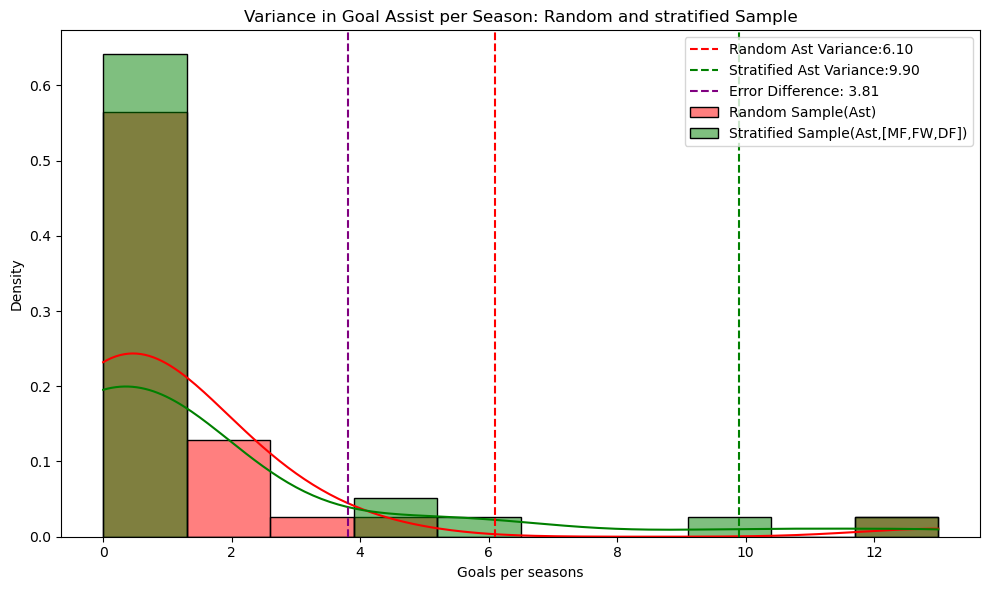

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

#create histogram for random and stratified sampling

plt.figure(figsize=(10,6))

sns.histplot(random_sample['Ast'],kde=True,color='red',label='Random Sample(Ast)',stat='density',bins=10)
sns.histplot(stratified_sample['Ast'],kde=True,color='green',label='Stratified Sample(Ast,[MF,FW,DF])',stat='density',bins=10)

#add vertical lines for mean comparison

plt.axvline(ast_var_season1,color='red',linestyle='--',label=f'Random Ast Variance:{ast_var_season1:.2f}')
plt.axvline(ast_var_season2,color='green',linestyle='--',label=f'Stratified Ast Variance:{ast_var_season2:.2f}')
plt.axvline(abs(ast_var_season1-ast_var_season2),color='purple',linestyle='--',label=f'Error Difference: {abs(ast_var_season1-ast_var_season2):.2f}')
#labels and title
plt.title('Variance in Goal Assist per Season: Random and stratified Sample')
plt.xlabel('Goals per seasons')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.savefig('C:/project/draft/Statistics_Project/Sampling_Bias_and_Mean_Reversion_in_Football_Analytics/visuals/Random_Vs_stratified_sample.png')
plt.show()